In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import apply_affine_transform as Affine, apply_channel_shift as CShift, apply_brightness_shift as BShift

import pandas as pd
import random
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from tensorflow.keras import backend as K

from utils import *

info = pd.read_csv('./image_info.csv')

info.sort_values('whites', inplace=True)
info.reset_index(drop=True, inplace=True)

In [3]:
image1 =  load_image('./archive/kaggle_3m/TCGA_FG_A4MU_20030903/TCGA_FG_A4MU_20030903_16.tif')
mask1 = load_image('./archive/kaggle_3m/TCGA_FG_A4MU_20030903/TCGA_FG_A4MU_20030903_16_mask.tif', True)

image2 = load_image('./archive/kaggle_3m/TCGA_DU_A5TU_19980312/TCGA_DU_A5TU_19980312_18.tif')
mask2 = load_image('./archive/kaggle_3m/TCGA_DU_A5TU_19980312/TCGA_DU_A5TU_19980312_18_mask.tif', True)

# 21
image3 = load_image('./archive/kaggle_3m/TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_36.tif')
mask3 = load_image('./archive/kaggle_3m/TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_36_mask.tif', True)

# 78
image4 = load_image('./archive/kaggle_3m/TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_22.tif')
mask4 = load_image('./archive/kaggle_3m/TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_22_mask.tif', True)

# 111, 2561
image5 = load_image('./archive/kaggle_3m/TCGA_DU_6407_19860514/TCGA_DU_6407_19860514_34.tif')
mask5 = load_image('./archive/kaggle_3m/TCGA_DU_6407_19860514/TCGA_DU_6407_19860514_34_mask.tif', True)

# 111, 2562
image6 = load_image('./archive/kaggle_3m/TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_58.tif')
mask6 = load_image('./archive/kaggle_3m/TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_58_mask.tif', True)

# 237, 2578
image7 = load_image('./archive/kaggle_3m/TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_39.tif')
mask7 = load_image('./archive/kaggle_3m/TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_39_mask.tif', True)

# 423, 2604
image8 = load_image('./archive/kaggle_3m/TCGA_DU_8167_19970402/TCGA_DU_8167_19970402_12.tif')
mask8 = load_image('./archive/kaggle_3m/TCGA_DU_8167_19970402/TCGA_DU_8167_19970402_12_mask.tif', True)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


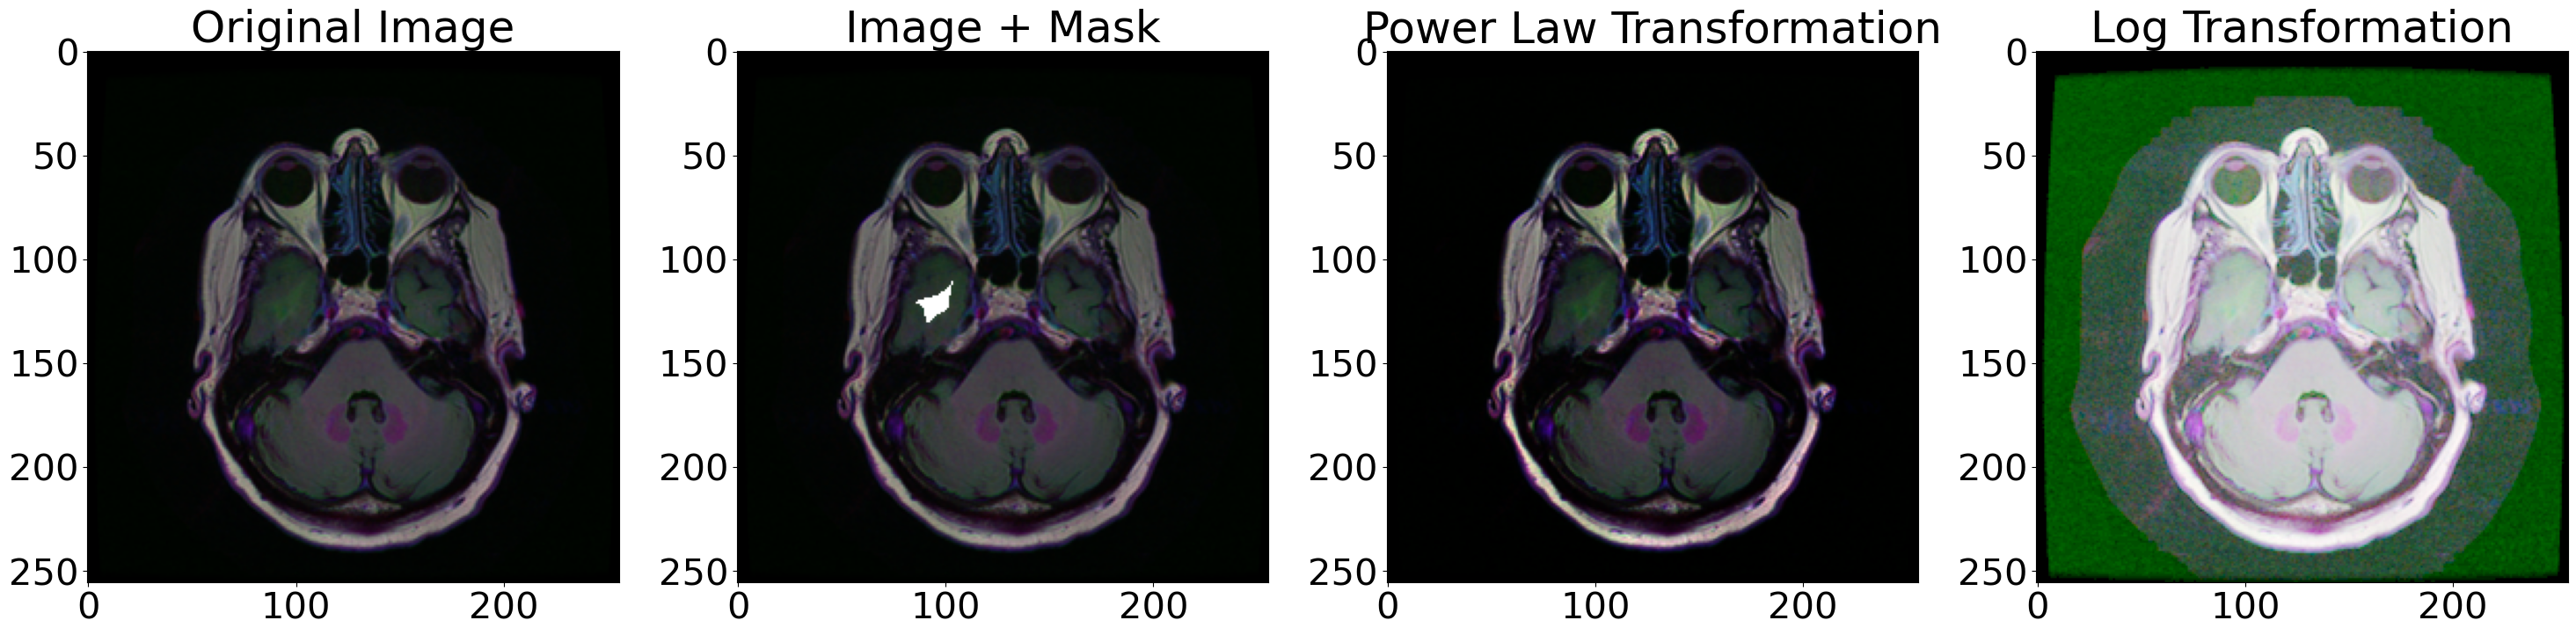

In [7]:
fig,axes = plt.subplots(1, 4, figsize=(30,25))

axes[0].title.set_text('Original Image')
axes[0].imshow(image8)

axes[1].title.set_text('Image + Mask')
im = image8.copy()
im[mask8==1] = 255
axes[1].imshow(im)

axes[2].title.set_text('Power Law Transformation', )
axes[2].imshow(power_law_combination(image8, [1.1, 1.4, 1.7]))

axes[3].title.set_text('Log Transformation')
axes[3].imshow(log_transform(image8))

fig.tight_layout()

In [6]:
plt.rcParams.update({'font.size': 30})

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


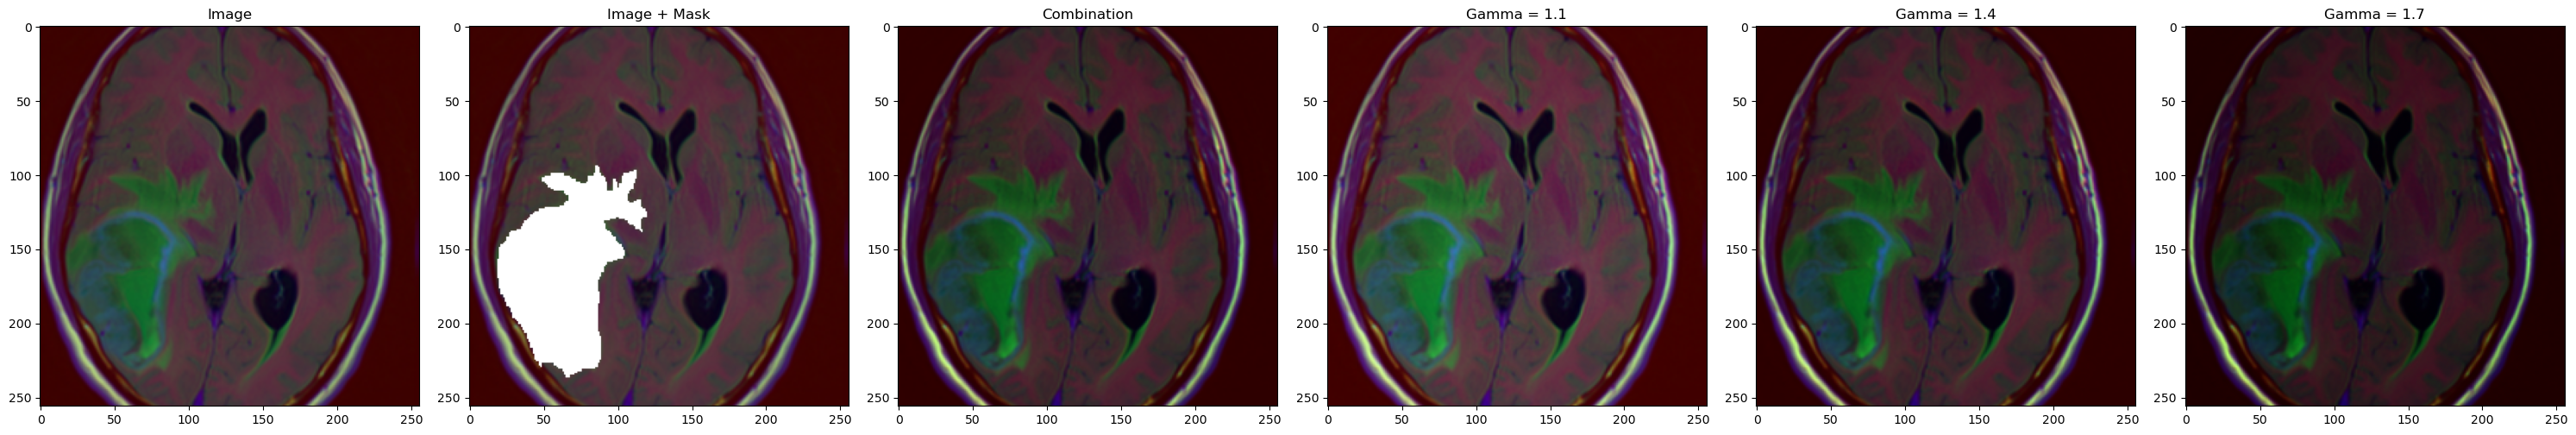

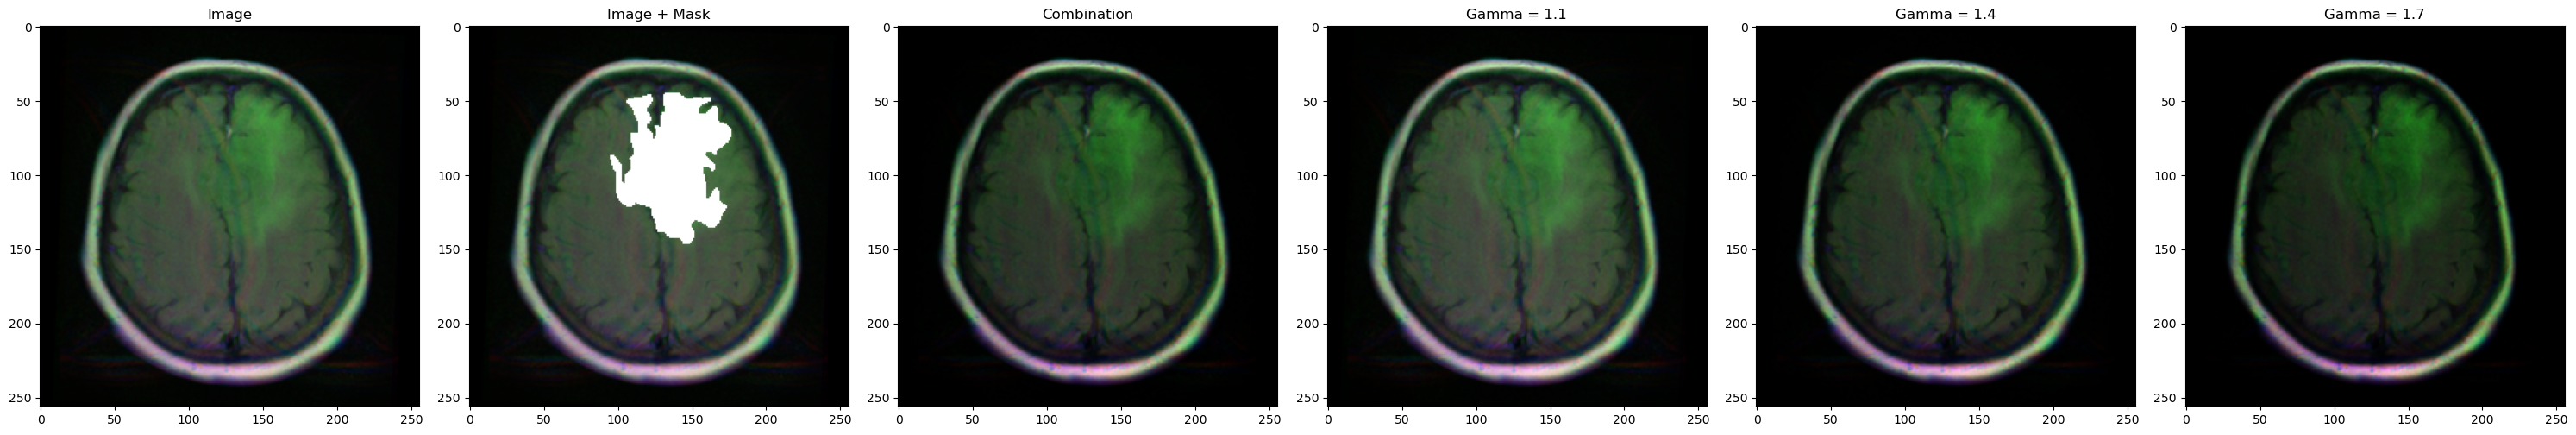

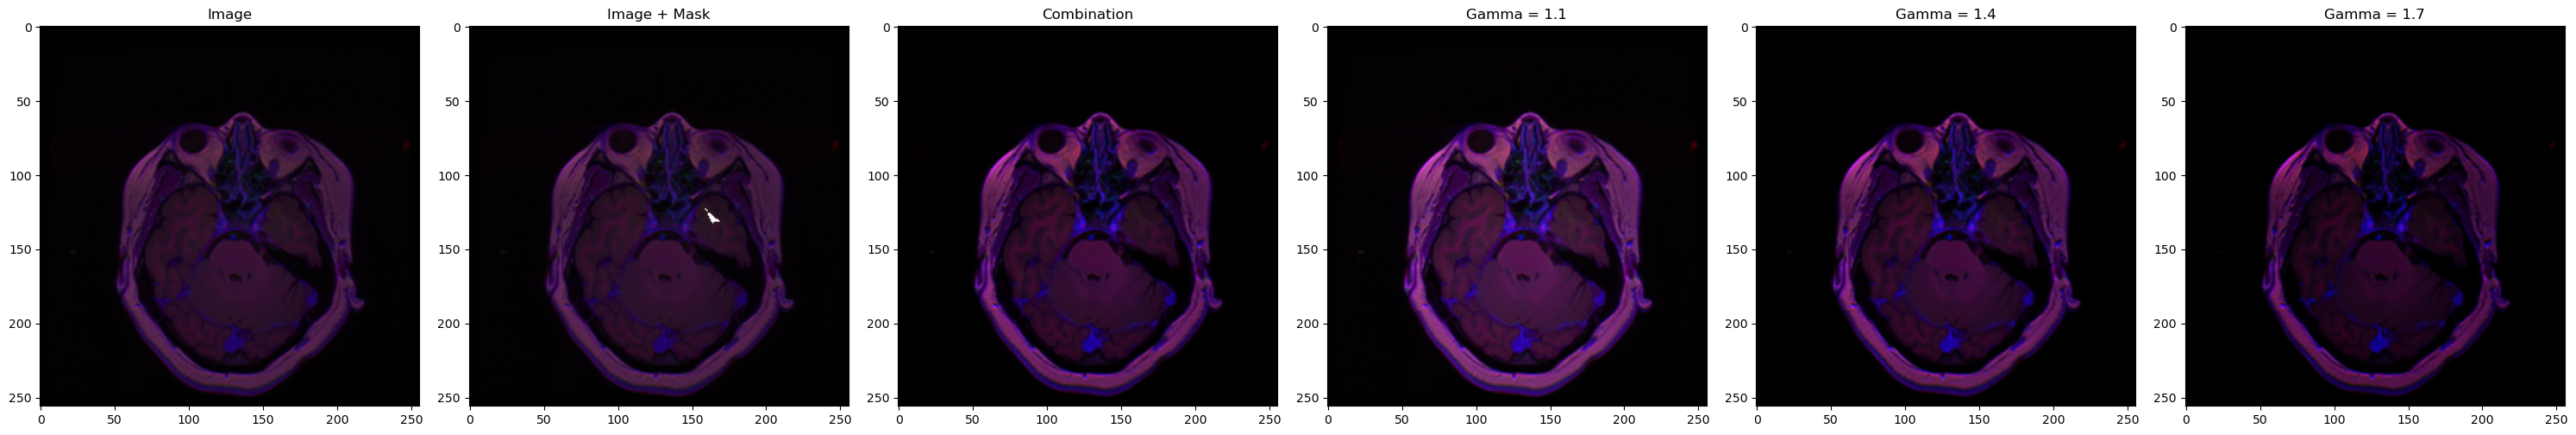

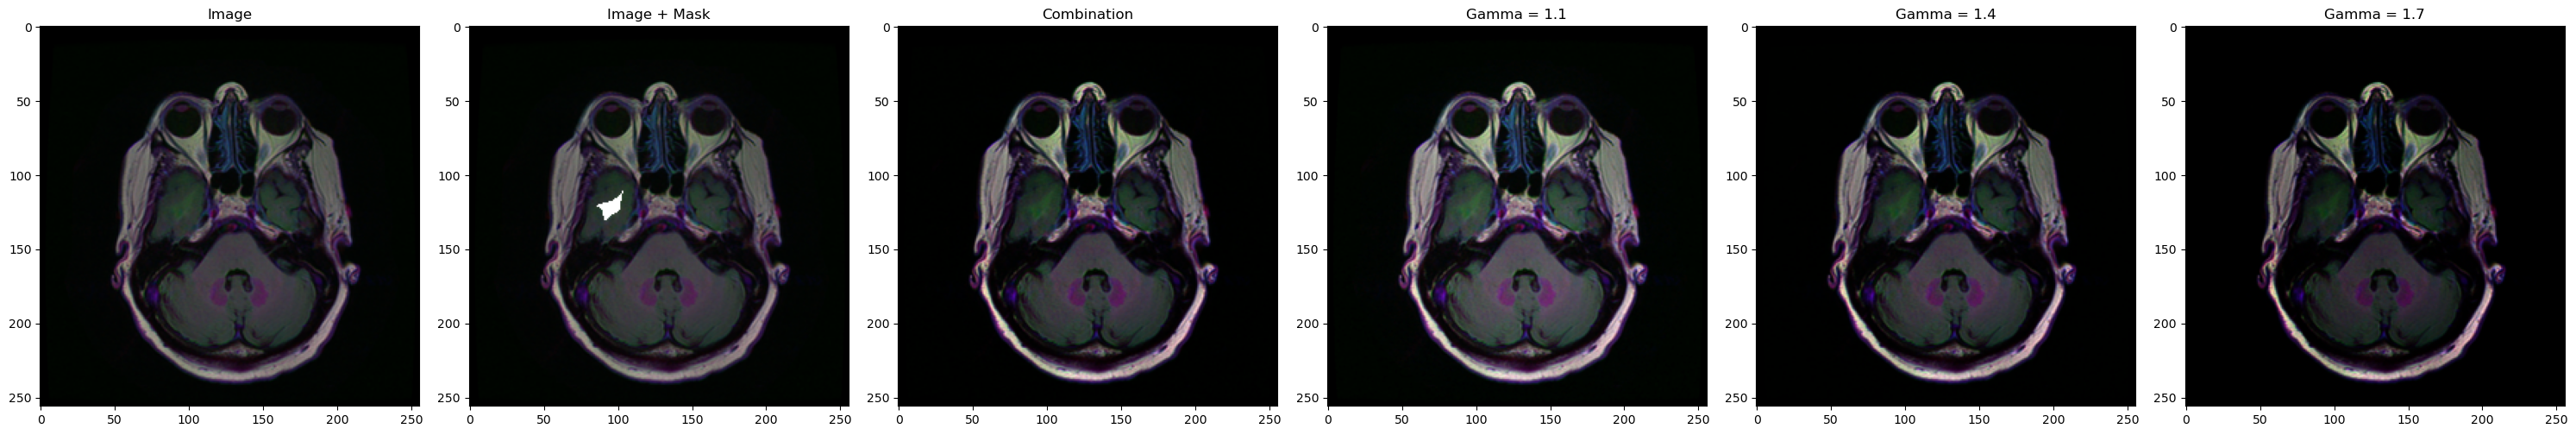

In [6]:
l = [1.1, 1.4, 1.7]
power_law_demonstration(image1, mask1, l)
power_law_demonstration(image2, mask2, l)
power_law_demonstration(image4, mask4, l)
power_law_demonstration(image8, mask8, l)

In [32]:
def channel_shift(img, IN=0.5):
    return CShift(img, IN) + CShift(img, IN, 1) + CShift(img, IN, 2)

def channel_shift_comb(img, INs=[0.01, 0.001, 0.1]):
    im = 0

    for IN in INs:
        im += channel_shift(img, IN)
    
    return im

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


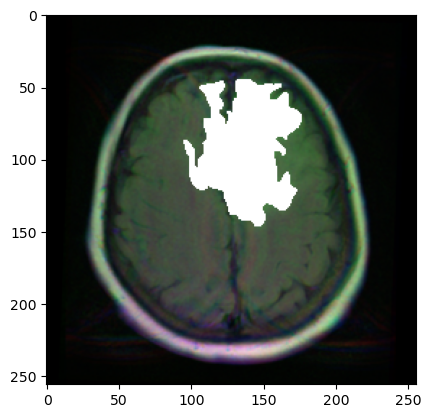

In [3]:
img = image2.copy()
img[mask2 == 1] = 255
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


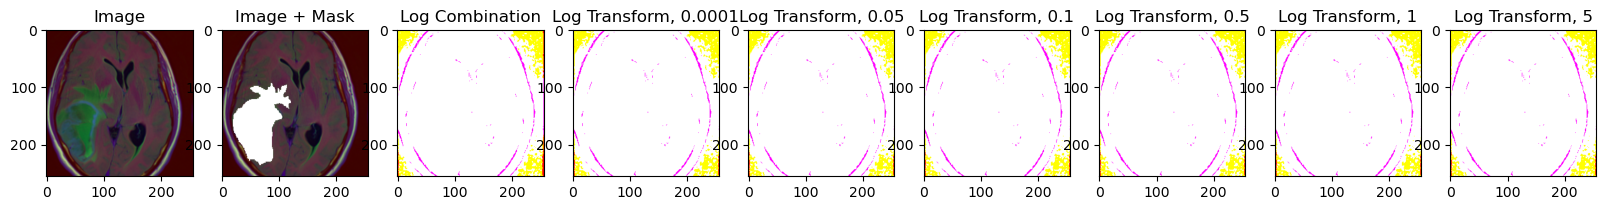

In [8]:
log_transform_demonstration(image1, mask1, [0.0001, 0.05, 0.1, 0.5, 1, 5])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


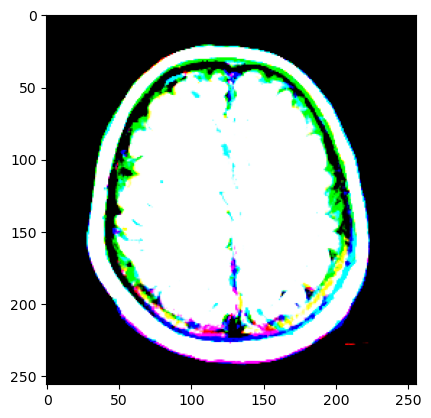

In [52]:
plt.imshow(channel_shift_comb(image2, [0.0000001, 0.1]))

In [10]:
smooth =100

from keras.models import load_model
model = load_model('./unet_membrane.hdf5',  compile=False)

def iou(y_true, y_pred):
    intersection = K.sum(y_true * y_pred)
    sum_ = K.sum(y_true + y_pred)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

def dice_coef(y_true, y_pred):
    y_truef=K.flatten(y_true)
    y_predf=K.flatten(y_pred)
    And=K.sum(y_truef* y_predf)
    return((2* And + smooth) / (K.sum(y_truef) + K.sum(y_predf) + smooth))

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)



Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-11-17 16:27:51.397018: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-17 16:27:51.397435: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [22]:
def power_law(img, gamma=0.1):
    im = img.copy()
    return np.array(255*(im / 255) ** gamma, dtype = 'uint8')

def power_law_combination(img, gammas=[0.01, 0.1, 0.2, 0.8]):
    image = 0

    for gamma in gammas:
        image += power_law(img, gamma)

    return image

def power_law_demonstration(image, mask, gammas=[0.8, 0.9, 0.85, 0.88]):
    fig,axes = plt.subplots(1,len(gammas)+3, figsize=(30,25))

    axes[0].title.set_text('Image')
    axes[0].imshow(image)

    axes[1].title.set_text('Image + Mask')
    im = image.copy()
    im[mask==1] = 255.0
    axes[1].imshow(im)

    axes[2].title.set_text('Combination')
    axes[2].imshow(power_law_combination(image, gammas))

    for index, gamma in enumerate(gammas):
        axes[index + 3].title.set_text(f'Gamma = {gamma}')
        axes[index + 3].imshow(power_law(image, gamma))

    fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


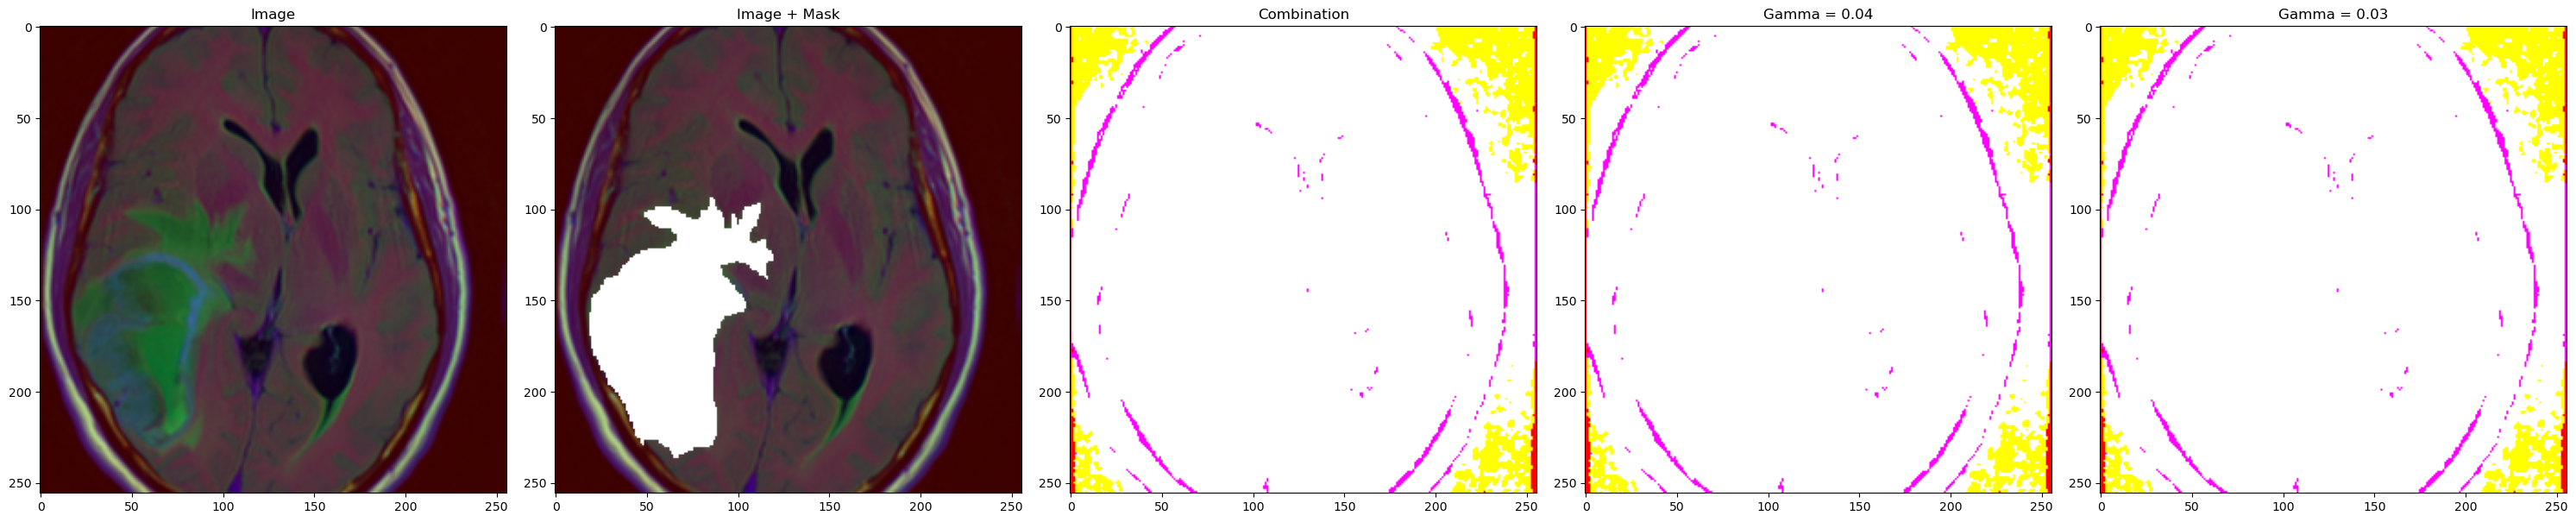

In [9]:
power_law_demonstration(image1, mask1, [0.04, 0.03])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


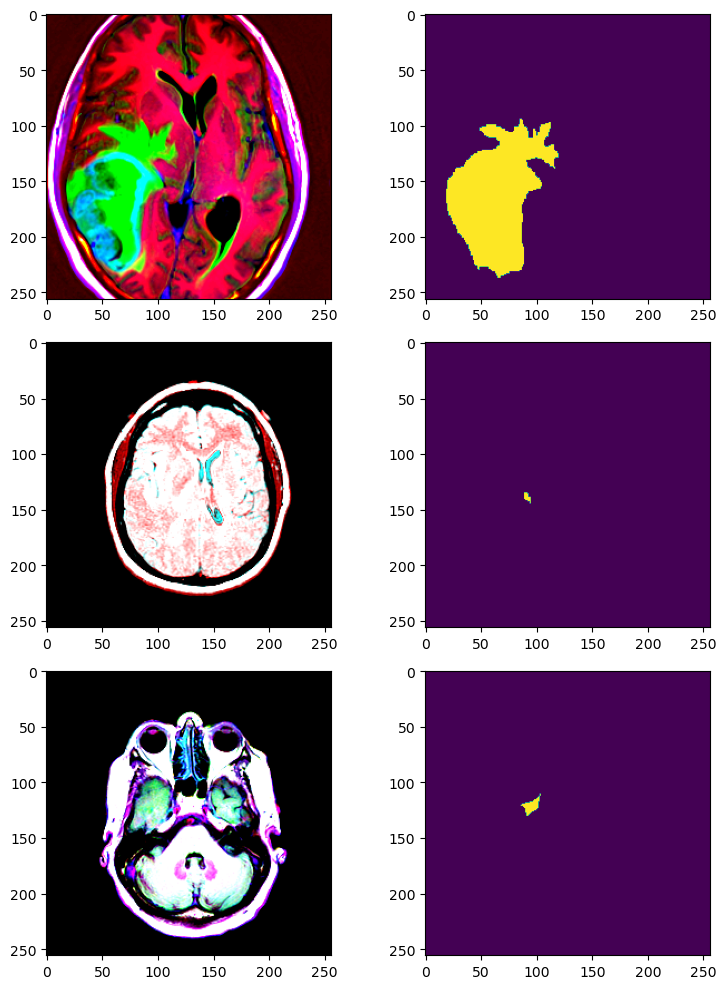

In [36]:
fig,axes = plt.subplots(3, 2, figsize=(8,10))

axes[0][0].imshow(image1)
axes[0][1].imshow(mask1)
axes[1][0].imshow(image5)
axes[1][1].imshow(mask5)
axes[2][0].imshow(image8)
axes[2][1].imshow(mask8)

fig.tight_layout()

In [11]:
def predict_show(items):
    X = np.empty((len(items), 256, 256 ,3))

    for i in range(len(items)):
        X[i, ] = items[i][0]

    preds = model.predict(X)

    fig,axes = plt.subplots(2,len(items) , figsize=(30,25))

    index = 0
    for img, mask in items:
        im = img.copy()
        im[mask==255]=255

        met1 = round(iou(mask, preds[index]).numpy(), 4)
        met2 = round(dice_coef_loss(mask, preds[index]).numpy(), 4)

        print(met1, met2)
        
        axes[0][index].title.set_text(f'IOU: {met1}, Dice: {met2}')
        axes[0][index].imshow(im)
        index += 1
    
    index = 0
    for pred in preds:
        axes[1][index].imshow(pred)

        index += 1

S1 = [(image1, mask1), (image2, mask2), (image3, mask3)]

2022-11-17 16:28:16.774414: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-17 16:28:16.894807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 590ms/step
0.0933 0.6299
0.0779 0.7438
1e-04 0.9962


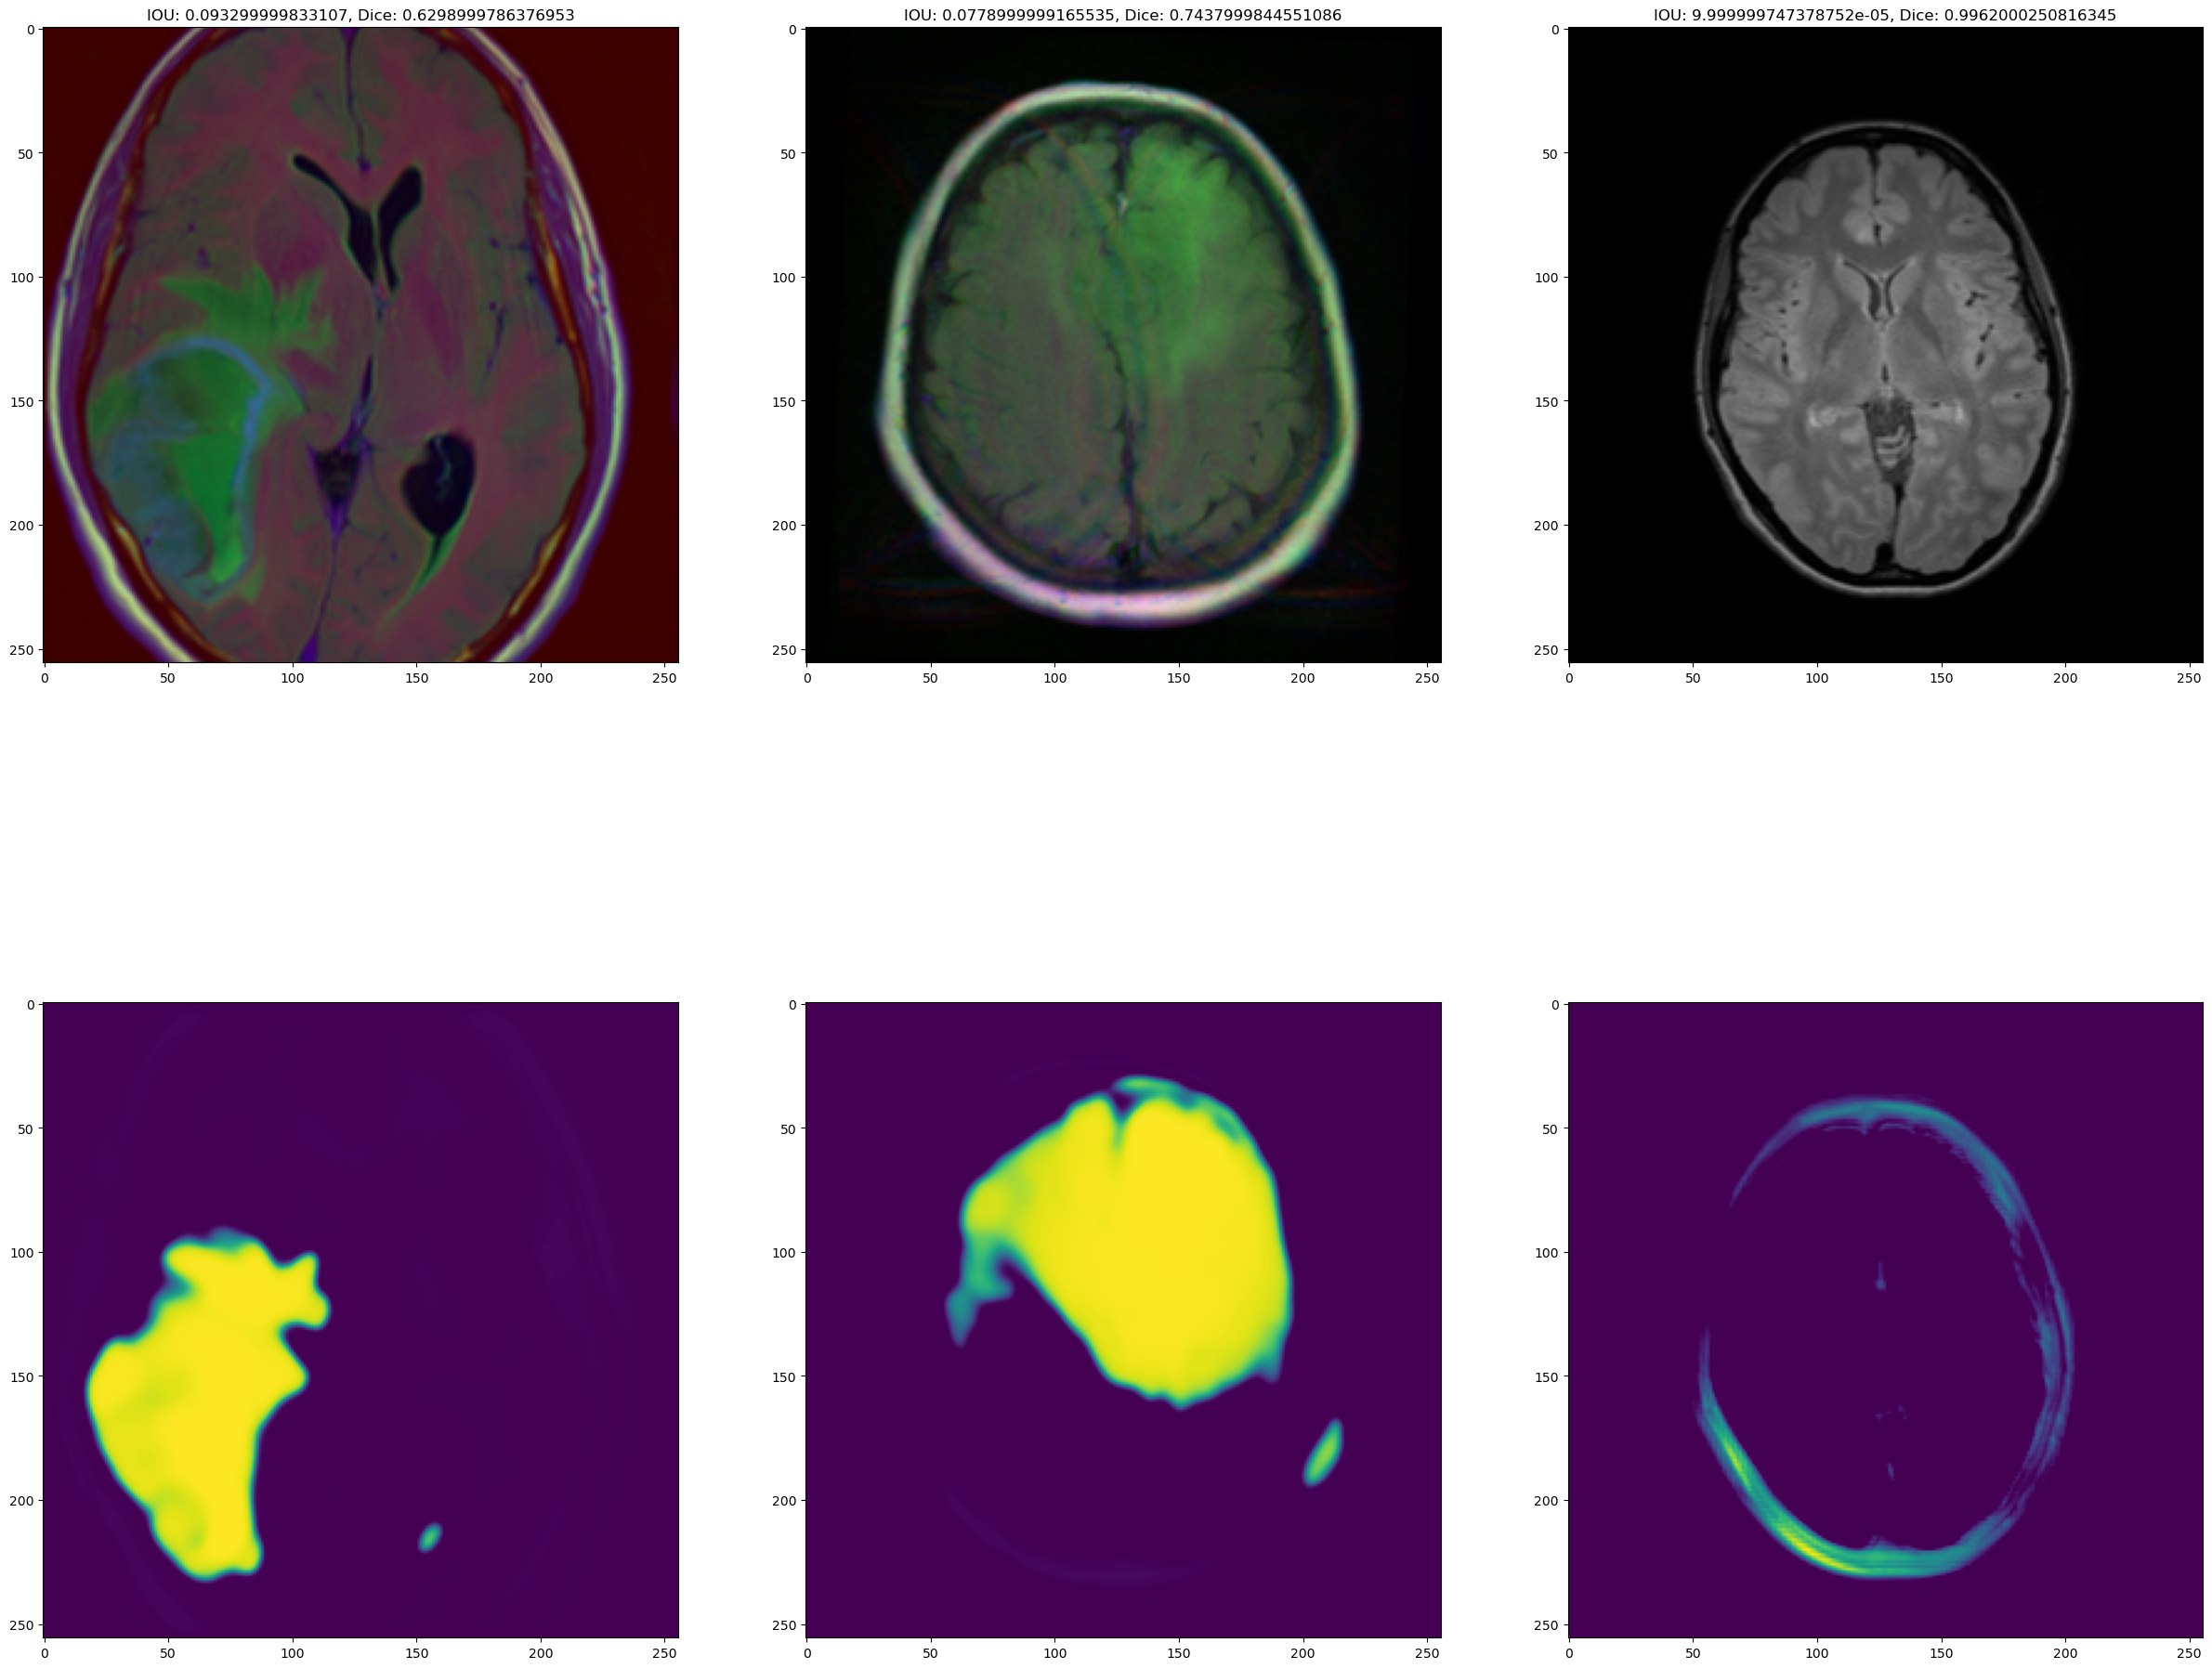

In [12]:
predict_show(S1)

1/1 [==============================] - 0s 303ms/step


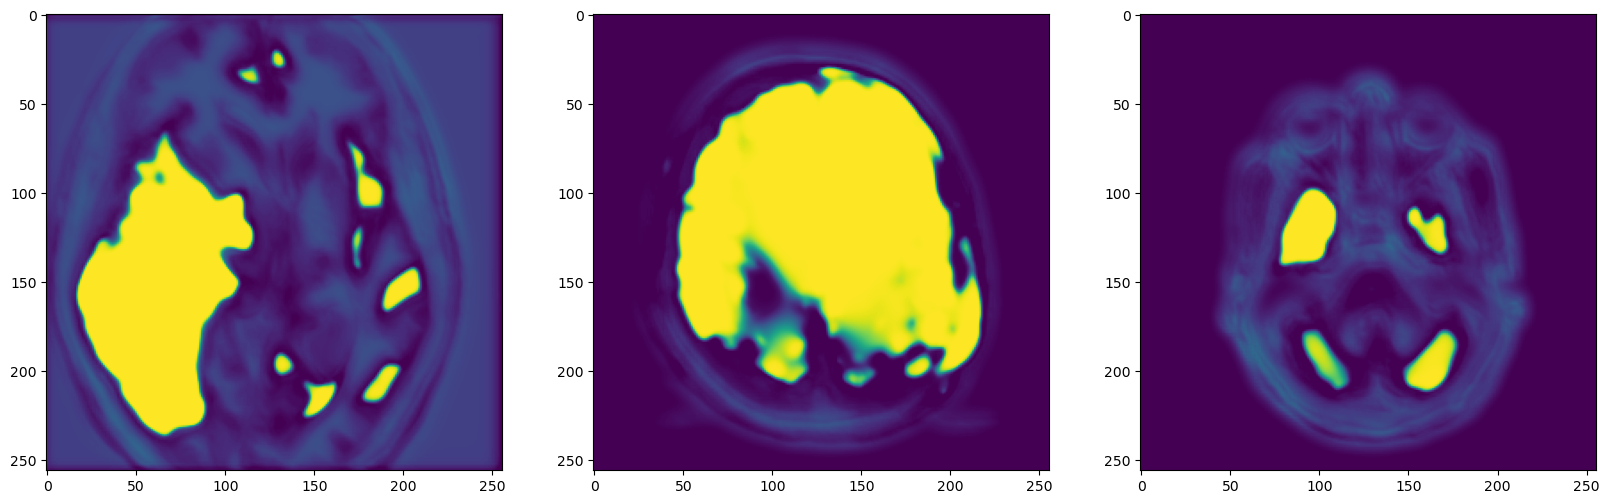

In [14]:
X1 = np.empty((3, 256, 256 ,3))

im1_p = log_transform_combination(image1)

im2_p = log_transform_combination(image2)

im8_p = log_transform_combination(image8)

X1[0, ] = im1_p
X1[1, ] = im2_p
X1[2, ] = im8_p

pred = model.predict(X1)

fig,axes = plt.subplots(1, 3, figsize=(20,15))

axes[0].imshow(pred[0])
axes[1].imshow(pred[1])
axes[2].imshow(pred[2])

In [ ]:
im = image1.copy()
im[mask1==255]=255

# print(dice_coef_loss(im1_p, mask1))
# print(dice_coef_loss(pred[0], mask1))

In [ ]:
X1 = np.empty((3, 256, 256 ,3))

im1_p = power_law_combination(image1, [0.8, 0.9, 0.85, 0.88])
im1_p = preprocess_image(im1_p)

im2_p = power_law_combination(image2)
im2_p = preprocess_image(im2_p)

im8_p = power_law_combination(image8)
im8_p = preprocess_image(im8_p)

X1[0, ] = im1_p
X1[1, ] = im2_p
X1[2, ] = im8_p

pred = model.predict(X1)

fig,axes = plt.subplots(1, 3, figsize=(20,15))

axes[0].imshow(pred[0])
axes[1].imshow(pred[1])
axes[2].imshow(pred[2])